# Importing dataset and fixing variables

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from itertools import combinations
import phik
import scipy.stats as stats
# Read the CSV file while seperating the data 
unclean_data = pd.read_csv("Portugal_Student_Data.csv", sep = ";")

# Display the first few rows
print(unclean_data.head())

   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                         

- Removing variables that we won't be needing to predict drop out

Note: Dimensions are still included in our data and won't be seperated. Dimensions are there just to help with analyzing and dividing work.

In [2]:
#Removing columns

df = unclean_data.drop(columns = ["Nacionality", "Curricular units 2nd sem (credited)", 
                                  "Curricular units 2nd sem (enrolled)",
                                  "Curricular units 2nd sem (evaluations)",
                                  "Curricular units 2nd sem (approved)",
                                  "Curricular units 2nd sem (grade)",
                                  "Curricular units 2nd sem (without evaluations)",
                                  "Curricular units 1st sem (enrolled)",
                                  "Curricular units 1st sem (evaluations)",
                                  "Curricular units 1st sem (approved)",
                                  "Curricular units 1st sem (grade)",
                                  "Curricular units 1st sem (without evaluations)",
                                  "Curricular units 1st sem (credited)"])

print(df.head())

   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Mother's qualification  \
0                           122.0                      19   
1                           160.0                       1   
2                           122.0                      37   
3   

- Mother and father columns need to be renamed later on for MANOVA
- Encoding Target variable

In [3]:
#Renaming Mother and Father variables

df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.strip() 
df.rename(columns={
    "Mother's_occupation": "Mother_occupation",
    "Mother's_qualification": "Mother_qualification",
    "Father's_occupation": "Father_occupation",
    "Father's_qualification": "Father_qualification",
    "Daytime/evening attendance/\t":"Daytime/evening attendance" 
}, inplace=True)


# Encoding the target variable: enrolled, graduate and dropout

mapping = {'Graduate': 0, "Enrolled": 1, "Dropout": 2}

df["Target"] = df["Target"].replace(mapping)

print(df["Target"].head())

0    2
1    0
2    2
3    0
4    0
Name: Target, dtype: int64


C:\Users\amann\AppData\Local\Temp\ipykernel_3756\852471650.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Target"] = df["Target"].replace(mapping)


In [4]:
print(df.columns.tolist())


['Marital_status', 'Application_mode', 'Application_order', 'Course', 'Daytime/evening_attendance', 'Previous_qualification', 'Previous_qualification_(grade)', 'Mother_qualification', 'Father_qualification', 'Mother_occupation', 'Father_occupation', 'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'Age_at_enrollment', 'International', 'Unemployment_rate', 'Inflation_rate', 'GDP', 'Target']


# Start EDA

Checking data types and description

In [5]:
#Checking data types to use as a filter to create the correlation matrix
df.dtypes

Marital_status                      int64
Application_mode                    int64
Application_order                   int64
Course                              int64
Daytime/evening_attendance          int64
Previous_qualification              int64
Previous_qualification_(grade)    float64
Mother_qualification                int64
Father_qualification                int64
Mother_occupation                   int64
Father_occupation                   int64
Admission_grade                   float64
Displaced                           int64
Educational_special_needs           int64
Debtor                              int64
Tuition_fees_up_to_date             int64
Gender                              int64
Scholarship_holder                  int64
Age_at_enrollment                   int64
International                       int64
Unemployment_rate                 float64
Inflation_rate                    float64
GDP                               float64
Target                            

In [6]:
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime/evening_attendance,Previous_qualification,Previous_qualification_(grade),Mother_qualification,Father_qualification,Mother_occupation,...,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Unemployment_rate,Inflation_rate,GDP,Target
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,19.561935,22.275316,10.960895,...,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,11.566139,1.228029,0.001969,0.821881
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,15.603186,15.343108,26.418253,...,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.663850,1.382711,2.269935,0.888243
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,7.600000,-0.800000,-4.060000,0.000000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,2.000000,3.000000,4.000000,...,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,9.400000,0.300000,-1.700000,0.000000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,19.000000,19.000000,5.000000,...,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,11.100000,1.400000,0.320000,1.000000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,37.000000,37.000000,9.000000,...,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,13.900000,2.600000,1.790000,2.000000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,44.000000,44.000000,194.000000,...,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,16.200000,3.700000,3.510000,2.000000


Checking for NA values
- Appears to have none

In [7]:
print(df.isnull().sum())

Marital_status                    0
Application_mode                  0
Application_order                 0
Course                            0
Daytime/evening_attendance        0
Previous_qualification            0
Previous_qualification_(grade)    0
Mother_qualification              0
Father_qualification              0
Mother_occupation                 0
Father_occupation                 0
Admission_grade                   0
Displaced                         0
Educational_special_needs         0
Debtor                            0
Tuition_fees_up_to_date           0
Gender                            0
Scholarship_holder                0
Age_at_enrollment                 0
International                     0
Unemployment_rate                 0
Inflation_rate                    0
GDP                               0
Target                            0
dtype: int64


Standarizing variables because predictive modeling is sensitive to scaling
- Grading scale: https://withportugal.com/en/blog/ensino-superior-2024

In [8]:
# Admission grade is out of 200 in Portugal
# Standardizing will help both the audience understand and modeling results
df['Admission_grade'] = df['Admission_grade']/2
print(df['Admission_grade'].head())

# Doing the same for prev qualification
df['Previous_qualification_(grade)'] = df['Previous_qualification_(grade)']/2
print(df['Previous_qualification_(grade)'].head())

#renaming the same column
df.rename(columns={'Previous_qualification_(grade)': 'Previous_qualification_grade'}, inplace=True)


0    63.65
1    71.25
2    62.40
3    59.80
4    70.75
Name: Admission_grade, dtype: float64
0    61.0
1    80.0
2    61.0
3    61.0
4    50.0
Name: Previous_qualification_(grade), dtype: float64


Converting GDP and inflation rates from percentages into decimals

In [9]:
df['GDP'] = df['GDP'] / 100
print(df['GDP'].head())

df['Inflation_rate'] = df['Inflation_rate'] / 100
print(df['Inflation_rate'].head())

df['Unemployment_rate'] = df['Unemployment_rate'] / 100
print(df['Unemployment_rate'].head())

0    0.0174
1    0.0079
2    0.0174
3   -0.0312
4    0.0079
Name: GDP, dtype: float64
0    0.014
1   -0.003
2    0.014
3   -0.008
4   -0.003
Name: Inflation_rate, dtype: float64
0    0.108
1    0.139
2    0.108
3    0.094
4    0.139
Name: Unemployment_rate, dtype: float64


Visualizing the distribution of variables

<function matplotlib.pyplot.show(close=None, block=None)>

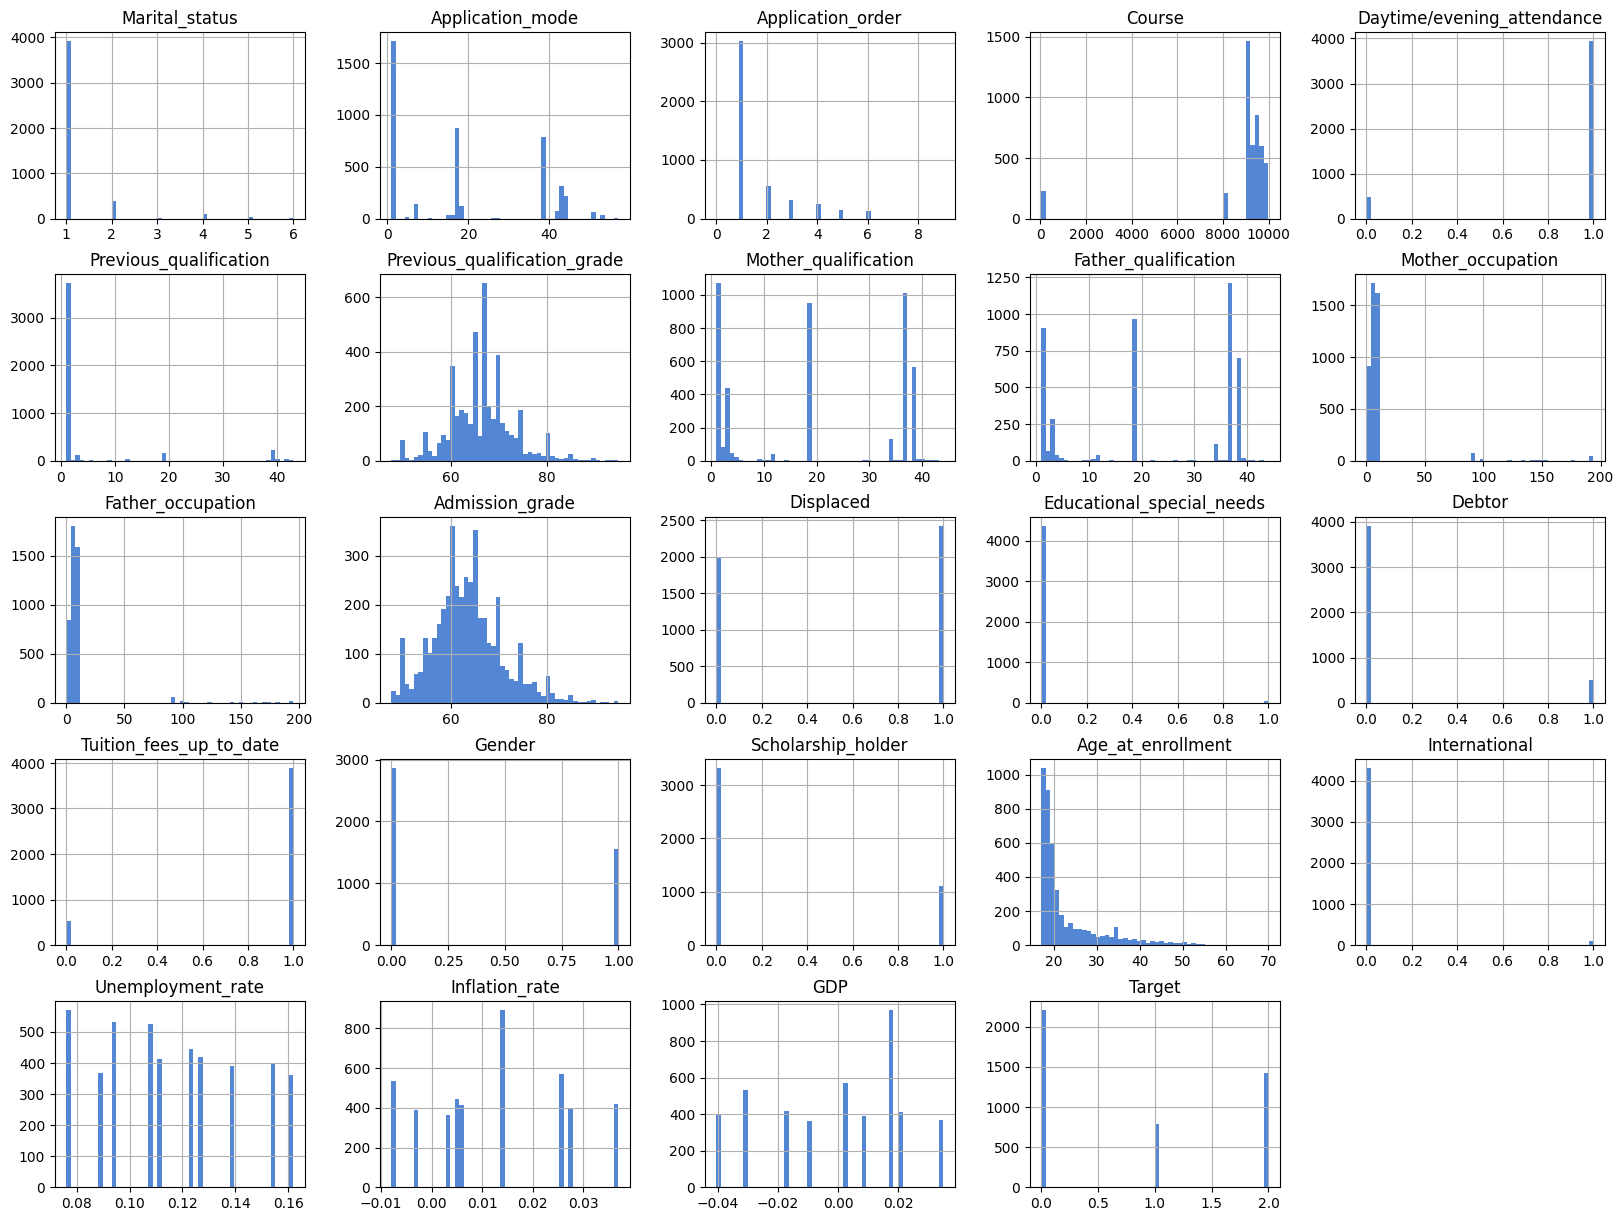

In [10]:
df[df.columns].hist(bins= 50, figsize=(20,15), color='#5486d6')
plt.show

Transforming Age at enrollment

In [11]:
# age is skewed to the right so we will take the log

df["Age_at_enrollment"] = np.log(df["Age_at_enrollment"])


# Outliers

In [12]:
# Selecting continous data (just for correlation usage)
cont_df = df.select_dtypes(include=['float64'])
cont_df['Age_at_enrollment'] = df['Age_at_enrollment']
print(cont_df.head())


   Previous_qualification_grade  Admission_grade  Age_at_enrollment  \
0                          61.0            63.65           2.995732   
1                          80.0            71.25           2.944439   
2                          61.0            62.40           2.944439   
3                          61.0            59.80           2.995732   
4                          50.0            70.75           3.806662   

   Unemployment_rate  Inflation_rate     GDP  
0              0.108           0.014  0.0174  
1              0.139          -0.003  0.0079  
2              0.108           0.014  0.0174  
3              0.094          -0.008 -0.0312  
4              0.139          -0.003  0.0079  


Checking for outliers

- No signs of outliers in grades

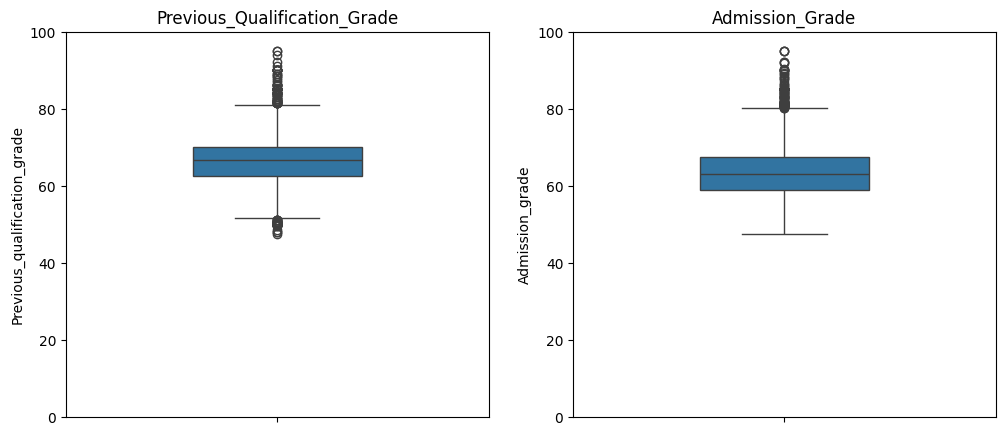

In [13]:
# Prev and Admission Grades

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot boxplots on each subplot
sns.boxplot(y=df['Previous_qualification_grade'], ax=axes[0], width = 0.4)
sns.boxplot(y=df['Admission_grade'], ax=axes[1], width = 0.4)

# Set titles for each subplot
axes[0].set_title('Previous_Qualification_Grade')
axes[0].set_ylim(0, 100)

axes[1].set_title('Admission_Grade')
axes[1].set_ylim(0, 100)


plt.show()

- Both unemployment and inflation rates at the year of the student's interview seem not to have any dangerous outliers. The negative inflation rates indicate periods of deflation.

C:\Users\amann\AppData\Local\Temp\ipykernel_3756\660574864.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_dict.values(), labels=data_dict.keys())


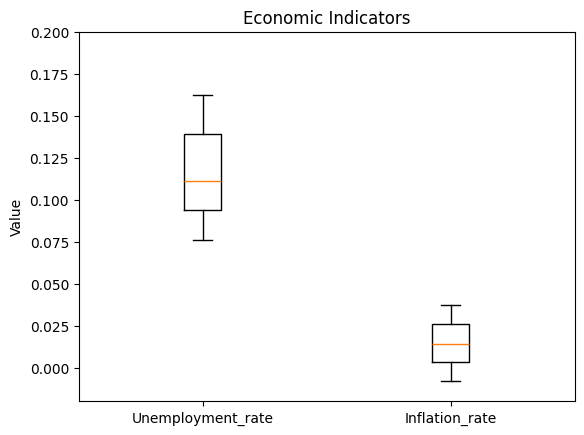

In [14]:
data_dict = {
    "Unemployment_rate": df["Unemployment_rate"],
    "Inflation_rate": df["Inflation_rate"]
}

# Creating the boxplot
plt.boxplot(data_dict.values(), labels=data_dict.keys())
plt.title("Economic Indicators")
plt.ylabel("Value")
plt.ylim(-0.02, 0.20)
plt.show()


Boxplot for Age
- outliers seem normal for the log(age)

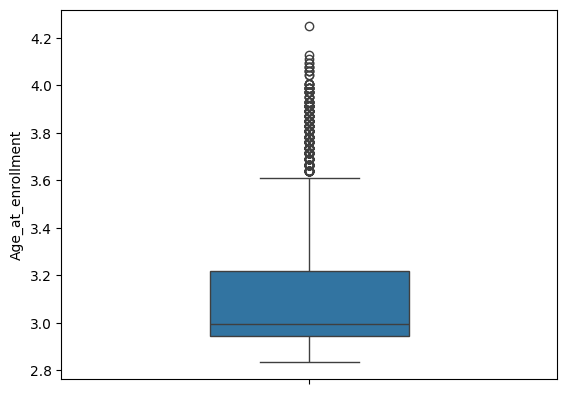

In [15]:
sns.boxplot(y=cont_df['Age_at_enrollment'], width = 0.4)

# plt.ylim(- 0.50, -0.20)
plt.show()

Boxplot for GDP
- no apparent outliers

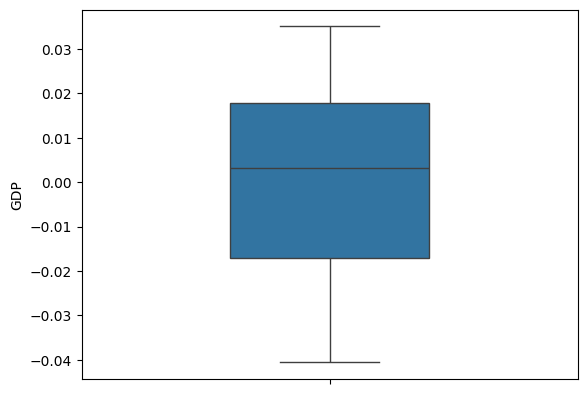

In [16]:
sns.boxplot(y=cont_df['GDP'], width = 0.4)

# plt.ylim(- 0.50, -0.20)
plt.show()

# Comparing different data types 

https://stackoverflow.com/questions/42661871/how-to-find-correlation-in-a-mixed-data-including-continuous-category-and-date

# Categorical vs Categorical Relationship

Suggest to remove:
1. Previous Qualification
2. Father's Occupation
3. Father's Qualification

- Use Chi square test https://www.geeksforgeeks.org/python-pearsons-chi-square-test/#

In [17]:
# Step 1: Identify binary columns (0/1 only)
binary_cols = [col for col in df.columns if set(df[col].dropna().unique()) <= {0, 1}]
binary_df = df[binary_cols]  

# Step 2: Get nominal columns as int64 excluding binary ones
nominal_df = df.select_dtypes(include=['int64']).drop(columns=binary_cols)

print("Binary columns:", binary_cols)
print("Nominal columns (after removing binary):", nominal_df.columns.tolist())


Binary columns: ['Daytime/evening_attendance', 'Displaced', 'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'International']
Nominal columns (after removing binary): ['Marital_status', 'Application_mode', 'Application_order', 'Course', 'Previous_qualification', 'Mother_qualification', 'Father_qualification', 'Mother_occupation', 'Father_occupation', 'Target']


- This fucntion will create a table that has both chi2 and cramer's V. Chi-2 tells you significance of variable meanwhile Cramer's V measures the association strength between 0 - 1. A value of 0 = no association and 1 = strong association.

In [18]:
def run_chi2_with_cramers_v(nominal_df, categorical_vars, alpha=0.05):
    results = []

    for var1, var2 in combinations(categorical_vars, 2):
        table = pd.crosstab(nominal_df[var1], nominal_df[var2])
        try:
            stat, p, dof, expected = chi2_contingency(table)
            n = table.sum().sum()
            k = min(table.shape)
            cramers_v = np.sqrt(stat / (n * (k - 1))) if k > 1 else np.nan
            results.append({
                "Variable 1": var1,
                "Variable 2": var2,
                "Chi2 Stat": round(stat, 2),
                "p-value": p,
                "Degrees of Freedom": dof,
                "Dependent": p <= alpha,
                "Cramer's V": round(cramers_v, 3)
            })
        except Exception as e:
            results.append({
                "Variable 1": var1,
                "Variable 2": var2,
                "Error": str(e)
            })

    return pd.DataFrame(results)




# Add a significance interpretation column
def interpret_significance(row):
    if 0.3 <= row["Cramer's V"] <= 0.4:
        return 'Keep one of the two variables'
    elif 0.1 <= row["Cramer's V"] < 0.3:
        return 'Keep'
    elif row["Cramer's V"] <= 0.05:
        return 'Remove'
    else:
        return 'Optional Keep'


- Optional keep variables are those where context is needed to keep them or not. If they add contextual meaning, we can keep them but if not, they can be removed.
- Also take into consideration the strength of the Cramer's V relationship with the target variable. The stronger it is while staying under 0.4, the more it would add to our model. Those variables can be kept.
- If a pair of variables have a high Cramer's V score of over 0.4, we should keep one of the two. The one we should keep is the one with the strongest Cramer's V score with the target variable.

##### Examples:
- We can keep marital status since it adds context to our demographic dimension and Cramer's V score is less than 0.4 in #1, #7, #8.
- Number 11 between application mode and previous qualification has a cramer's V of 0.41. Since the table is telling us it's optional to keep, we will look into keeping either one. Application mode has a V score of 0.230 with the Target meanwhile previous qualification has a V score of 0.158. Application mode should be kept and previous qualification can be dropped.
- The same thing with #35, since the V score > 0.4, we should keep one of the pair. Mother's qualification has very similar V score with Target in comparison to Father's qualification, so we should keep either depending on our situation.
- In #42, mother's occupation has a higher V score in comparison to father's occupation with the target variable. We should keep mother's occupation and drop the father's occupation. We could also drop father's qualification and keep mother's qualification to make our analysis easier.

In [19]:
# Step 1: Identify and remove binary columns (0/1)
binary_cols = [col for col in df.columns if set(df[col].dropna().unique()) <= {0, 1}]
nominal_df = df.select_dtypes(include=['int64']).drop(columns=binary_cols)

# Step 2: Define your nominal columns
nominal_columns = [ 
    "Marital_status", 
    "Application_mode",
    "Application_order",
    "Course",
    "Previous_qualification",
    "Mother_qualification",
    "Father_qualification",
    "Mother_occupation", 
    "Father_occupation",
    "Target"
]


# Step 3: Run chi-squared and Cramér's V
chi2_cramer_results = run_chi2_with_cramers_v(nominal_df, nominal_columns)

#adding the keep or remove column:

chi2_cramer_results['Keep/Remove'] = chi2_cramer_results.apply(interpret_significance, axis=1)
chi2_cramer_results

,Variable 1,Variable 2,Chi2 Stat,p-value,Degrees of Freedom,Dependent,Cramer's V,Keep/Remove
0,Marital_status,Application_mode,1193.49,5.360217e-195,85,True,0.232,Keep
1,Marital_status,Application_order,142.84,5.628934e-15,35,True,0.080,Optional Keep
2,Marital_status,Course,697.73,2.487516e-99,80,True,0.178,Keep
3,Marital_status,Previous_qualification,609.15,2.182617e-82,80,True,0.166,Keep
4,Marital_status,Mother_qualification,539.02,3.615419e-48,140,True,0.156,Keep
5,Marital_status,Father_qualification,379.07,6.908595e-19,165,True,0.131,Keep
6,Marital_status,Mother_occupation,226.41,1.609813e-04,155,True,0.101,Keep
7,Marital_status,Father_occupation,217.88,6.209376e-01,225,False,0.099,Optional Keep
8,Marital_status,Target,63.44,8.054280e-10,10,True,0.085,Optional Keep
9,Application_mode,Application_order,918.01,1.501981e-123,119,True,0.172,Keep


# Continuous vs Continous Relationship

Suggests to remove:
1. GDP
2. Unemployment rate
3. Inflation rate

- Economic factors like GDP, inflation and unemployment have no relation with grades and age. Meanwhile, previous qualification grade and admission have a strong positive relationship, log(age of enrollment) and grades have a weak negative relationship, and log(age of enrollment) with both economic factors and age has no trend. I would suggest to remove all economic factors and GDP from the model for a better fit.

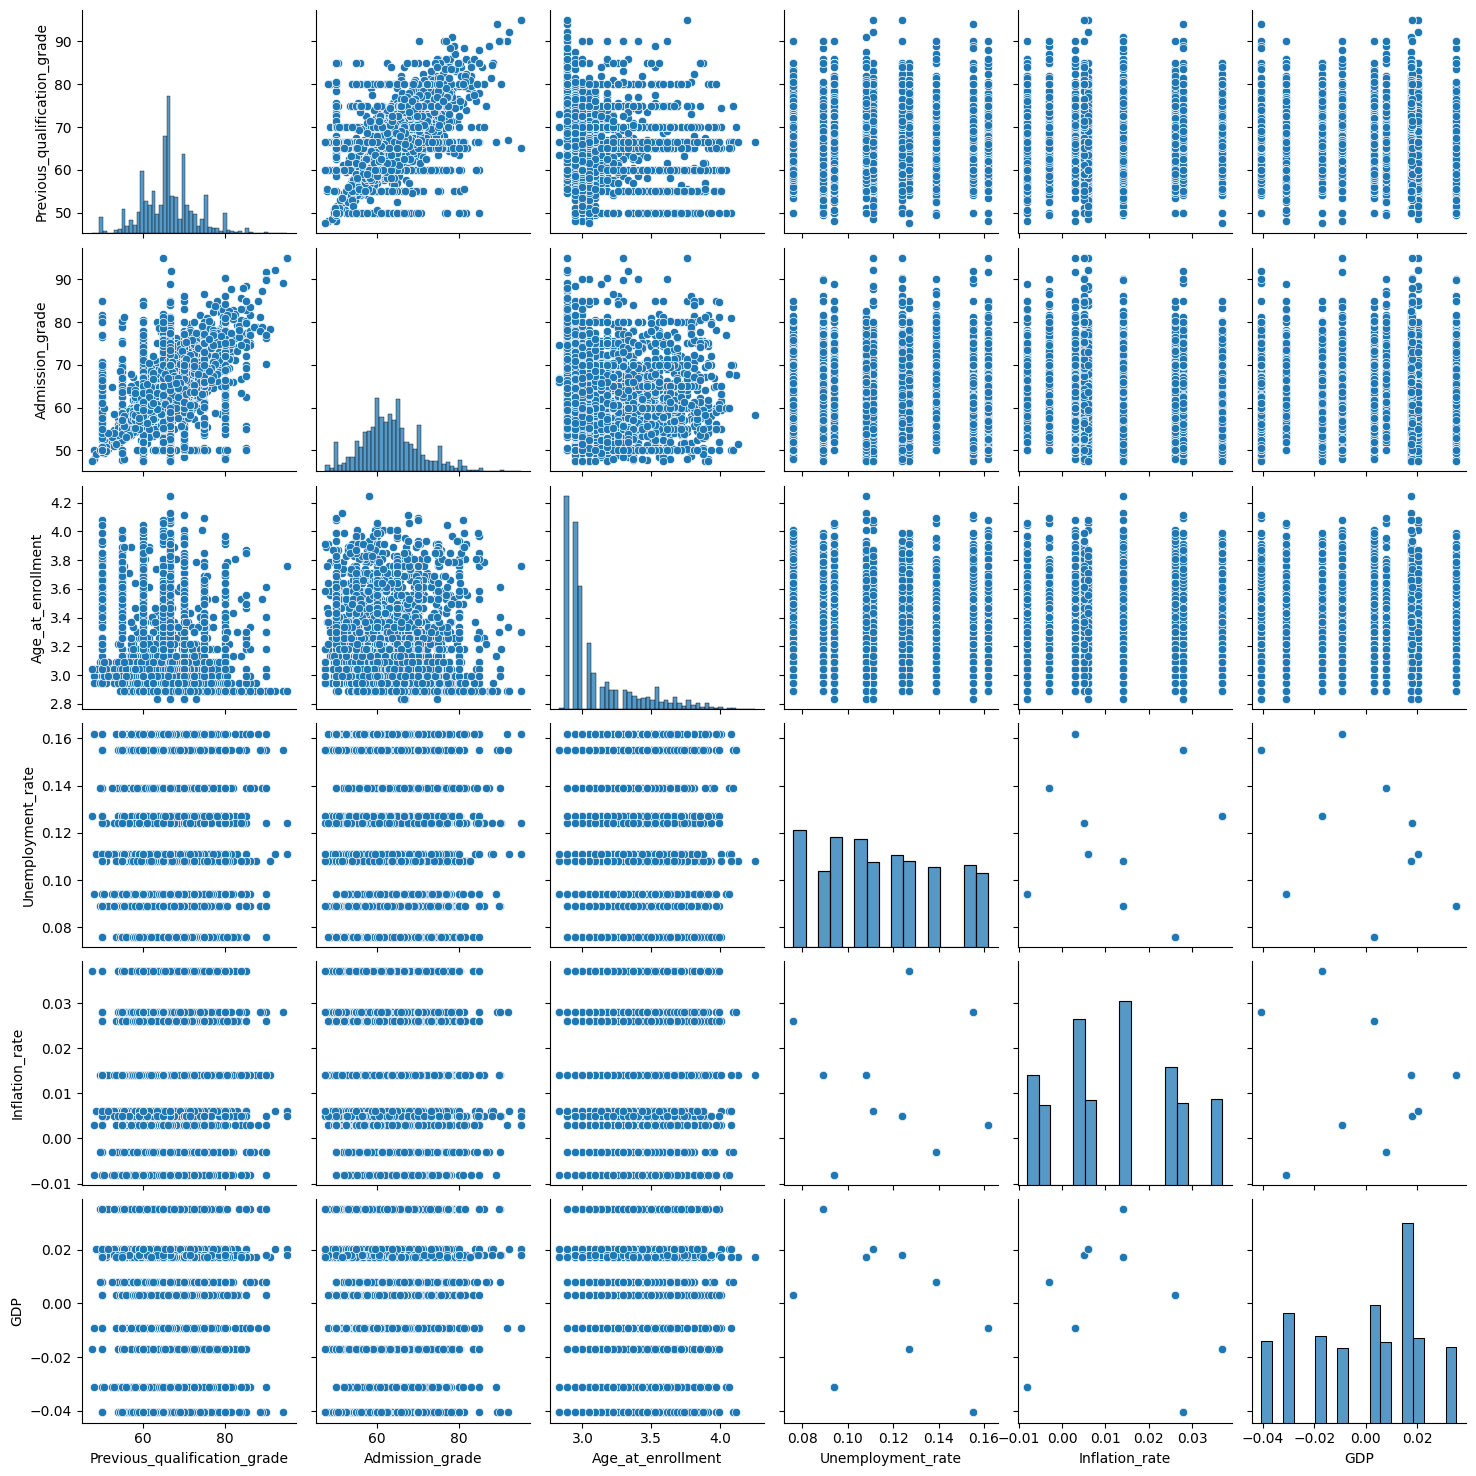

In [20]:
sns.pairplot(cont_df)

- Since the graph suggests no relationship between unemployment rate, inflation rate, and GDP with other variables, we can check the correlation between them all.
- unemployment rate, inflation rate and GDP all have a very weak correlation score too which means they should be dropped.

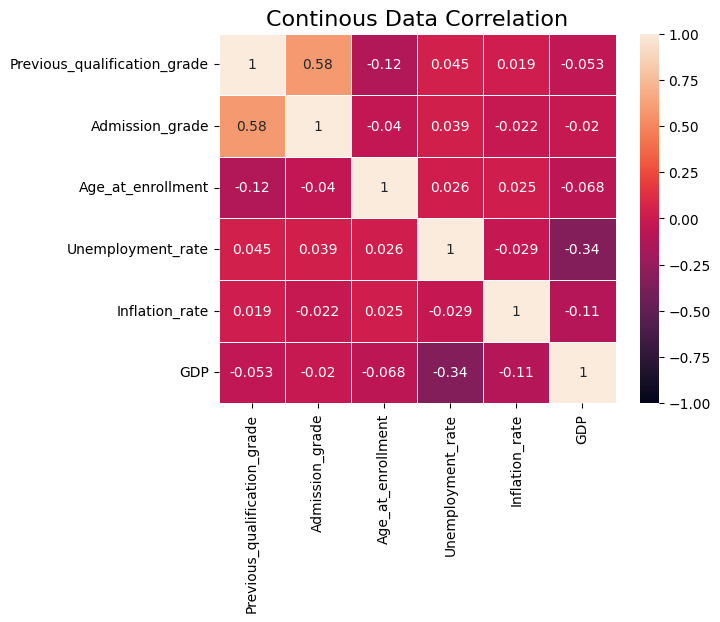

In [21]:
# Matrix plot of continous variables
    # Categorical variables contain numbers from 1 up to almost 30
    # Binary variables can be included in matrix plots but not nominal variables like metioned
    # Because Pearson's correlation assumes numeric meaning and linear meaning


tc = cont_df.corr()
sns.heatmap(tc, 
            annot = True, 
            vmin = -1,
            vmax = 1,
            linewidths = 0.5)

plt.title ("Continous Data Correlation", fontsize = 16)
plt.show()

# Continuous vs Categorical Relationship

Suggests to keep these variables unless other comparisons say to remove:

1. Father_qualification
2. Mother_occupation
3. Father_occupation
4. Course
5. Previous_qualification



- https://psiaims.github.io/CAMIS/python/MANOVA.html

- Important interpretations: <br>
| Test Name               | What it checks                           |<br>
| ----------------------- | ---------------------------------------- |<br>
| **Wilks' lambda**       | Lower = stronger group difference        |<br>

- All variables seam to have an somewhat okay significant level. You can tell that by looking at the p-value which is less than our standard 0.05, which means the effect is statistically significant. 

- The closer Wilk's lambda is to zero, the weaker the group differences are.

- The MANOVA table suggests to remove: Course, Previous_qualification, Father_qualification, Mother_occupation,Father_occupation. We can verify these results by checking the ANOVA between each variable for the continuous variables and categorical variables.

In [22]:
# Printing out formatted results
from statsmodels.multivariate.manova import MANOVA
results = []

# Remove 'Target' from nominal_df since we're predicting it for our model
nominal_df_filtered = nominal_df.drop(columns=['Target'])


for col in nominal_df_filtered:
    formula = f"{'+'.join(cont_df.columns)} ~ {col}"
    try:
        manova = MANOVA.from_formula(formula, data=df)
        mv_test = manova.mv_test().results[col]['stat']
        wilks = mv_test.loc["Wilks' lambda", "Value"]
        f_val = mv_test.loc["Wilks' lambda", "F Value"]
        p_val = mv_test.loc["Wilks' lambda", "Pr > F"]
        results.append((col, wilks, f_val, p_val))
    except Exception as e:
        print(f"Error with {col}: {e}")

# Convert to a DataFrame
summary_df = pd.DataFrame(results, columns=["Predictor", "Wilks_lambda", "F_value", "p_value"])


# Add a significance interpretation column
def interpret_significance(row):
    if row["Wilks_lambda"]<= 0.8 and row["p_value"] < 0.05:
        return 'Yes'
    
    elif 0.8 > row["Wilks_lambda"]<= 0.9 and row["p_value"] < 0.05:
        return 'Check Context'
    elif 0.8 > row["Wilks_lambda"]<= 0.9 and row["p_value"] > 0.05:
        return 'Remove'
    
    elif row["Wilks_lambda"]> 0.9 and row["p_value"] > 0.05:
        return 'Remove'
    elif row["Wilks_lambda"]> 0.9 and row["p_value"] < 0.05:
        return 'Remove'
    
    else:
        return 'Optional Keep'
    
summary_df["Keep/Remove"] =  summary_df.apply(interpret_significance, axis = 1)
summary_df

,Predictor,Wilks_lambda,F_value,p_value,Keep/Remove
0,Marital_status,0.729067,273.571694,1.500044e-298,Yes
1,Application_mode,0.678276,349.183433,0.000000e+00,Yes
2,Application_order,0.890336,90.675072,1.149608e-107,Optional Keep
3,Course,0.982251,13.302049,5.389290e-15,Remove
4,Previous_qualification,0.904394,77.822064,9.301368e-93,Remove
5,Mother_qualification,0.884148,96.461204,2.627080e-114,Optional Keep
6,Father_qualification,0.944668,43.119142,1.927199e-51,Remove
7,Mother_occupation,0.973174,20.292733,1.506252e-23,Remove
8,Father_occupation,0.973877,19.746601,7.045818e-23,Remove


- Since MANOVA suggested removing some variables, we'll double check their significance with ANOVA. Most of the categorical variables have a true significance level with other continous variables, so we should consider overriding MANOVA's results.
- A categorical variable would definitely be removed if it had almost no significant relationship with the continous variables, but since most have a significant relationship, we should keep them.
- For the variables that didn't pass Wilk's test since their value was almost over 0.9 and the MANOVA table suggested to remove them and the ANOVA table suggested to keep them due to significance with other continuous variables, we can <b>temporarily</b> keep them unless other comparisons suggest removing them also.

In [23]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

results = []

for cat_var in nominal_df_filtered.columns:
    for cont_var in cont_df.columns:
        try:
            # Combine both columns into a working DataFrame
            temp_df = pd.concat([nominal_df[cat_var], cont_df[cont_var]], axis=1)

            # Build formula: continuous ~ categorical
            formula = f"{cont_var} ~ C({cat_var})"
            model = ols(formula, data=temp_df).fit()
            anova_table = sm.stats.anova_lm(model, typ=2)

            # Extract key values
            f_val = anova_table.loc[f"C({cat_var})", "F"]
            p_val = anova_table.loc[f"C({cat_var})", "PR(>F)"]
            
            results.append({
                "Categorical Variable": cat_var,
                "Continuous Variable": cont_var,
                "F-value": f_val,
                "p-value": p_val,
                "Significant": p_val < 0.05
            })
        
        except Exception as e:
            print(f"Error for {cont_var} ~ {cat_var}: {e}")

anova_results_df = pd.DataFrame(results)
anova_results_df

,Categorical Variable,Continuous Variable,F-value,p-value,Significant
0,Marital_status,Previous_qualification_grade,2.532994,2.687673e-02,True
1,Marital_status,Admission_grade,3.679488,2.521579e-03,True
2,Marital_status,Age_at_enrollment,604.081287,0.000000e+00,True
3,Marital_status,Unemployment_rate,1.730235,1.240606e-01,False
4,Marital_status,Inflation_rate,0.403421,8.467418e-01,False
5,Marital_status,GDP,4.691313,2.827086e-04,True
6,Application_mode,Previous_qualification_grade,9.805334,4.535310e-26,True
7,Application_mode,Admission_grade,21.487393,2.376577e-64,True
8,Application_mode,Age_at_enrollment,424.501980,0.000000e+00,True
9,Application_mode,Unemployment_rate,12.240721,5.224598e-34,True


# Binary vs Binary Relationship
<br>

#### Suggests to remove or combine: 
1. tuition_fees_up_to_date
2. debtor

https://freedium.cfd/https://koshurai.medium.com/understanding-the-phi-coefficient-a-guide-to-measuring-correlation-between-categorical-variables-741aa9c5acf7

https://medium.com/@cdefaux/phi-coefficient-a-k-a-matthews-correlation-coefficient-binary-classification-11e2c29db91e

- Please remember we create the binary variable earlier from the categorical data before filtering it!


In [24]:
# Generate the phik (phi correlation) matrix
phik_matrix = binary_df.phik_matrix()


interval columns not set, guessing: ['Daytime/evening_attendance', 'Displaced', 'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'International']


- Here we can visualize Phi's Coefficient in a matrix plot. The higher the number is, the higher the correlation is which might cause multicollinearity issues. Variables with a high correlation like tuition fees up to date and debtor might cause some issues. 
- It's suggested to combine it with other variables or to remove it from the dataframe. The rest of variables look fine to me.
- For weaker variables, we might need to look into them in the future if we have bias issues.

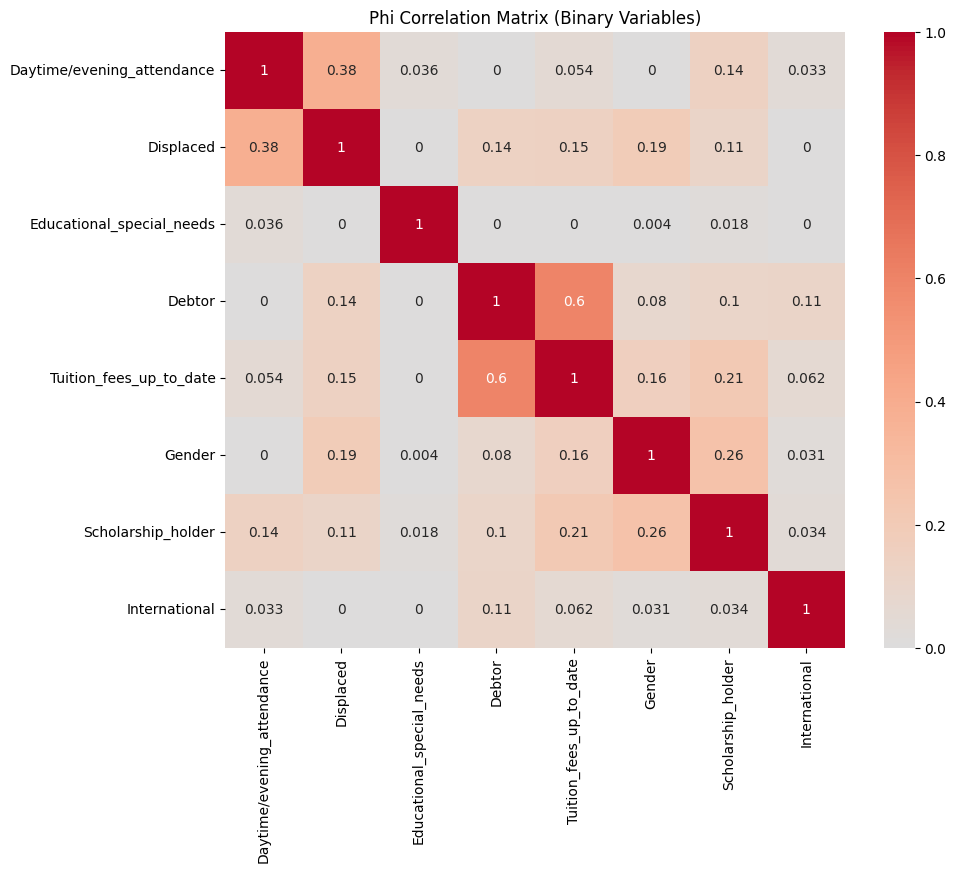

In [25]:

plt.figure(figsize=(10, 8))
sns.heatmap(phik_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Phi Correlation Matrix (Binary Variables)")
plt.show()


# Binary vs Continuous Relationship
<br> 

#### Suggests to remove 
1. Daytime/evening_attendance
2. Educational_special_needs
3. International

#### debate to keep:
1. Debtor
2. gender

- To compare binary vs continous variables, we need to complete a point biserial correlation. Over here I created a function to return to us add results.

- Point biserial correlation is another branch of Pearson's correlation with a value between -1 and 1 indicating the strength of the relationship. The closer the number is to 0, the weaker it is.

- Educational Special needs has 4 non significant relationships with continous variables and a very weak point biserial score so it should be removed.
- Displaced also has 3 non significant relationships and very weak point biserial scores.
- International has 4 non significant relationships and very weak point biserial scores.
- Daytime or evening attendence should be kept since it has a strong effect on Age.
- Tuition fees up to date and scholarship holder are also significant and have small but effective biserial scores on some variables.
- Meanwhile, debtor and gender should be initially kept in the model since they add a small effect on the age variable but if they cause some problems ahead we can remove them.

In [26]:
results = []

for cont_col in cont_df.columns:
    for bin_col in binary_df.columns:
        temp_df = pd.concat([cont_df[cont_col], binary_df[bin_col]], axis=1)
        if temp_df[bin_col].nunique() == 2:  # Confirm binary
            r, p = stats.pointbiserialr(temp_df[bin_col], temp_df[cont_col])
            results.append({
                'Binary_Var': bin_col,
                'Continuous_Var': cont_col,
                'PointBiserial_r': r,
                'p_value': p
            })

# Display as DataFrame
results_df = pd.DataFrame(results)

# Add a significance interpretation column
def interpret_significance(row):
    if row['p_value'] < 0.001:
        return '*** (p < 0.001)'
    elif row['p_value'] < 0.01:
        return '** (p < 0.01)'
    elif row['p_value'] < 0.05:
        return '* (p < 0.05)'
    else:
        return 'not significant'

results_df['Significance'] = results_df.apply(interpret_significance, axis=1)

results_df


,Binary_Var,Continuous_Var,PointBiserial_r,p_value,Significance
0,Daytime/evening_attendance,Previous_qualification_grade,0.052597,4.655346e-04,*** (p < 0.001)
1,Displaced,Previous_qualification_grade,-0.011001,4.644394e-01,not significant
2,Educational_special_needs,Previous_qualification_grade,-0.001458,9.227732e-01,not significant
3,Debtor,Previous_qualification_grade,-0.037507,1.260047e-02,* (p < 0.05)
4,Tuition_fees_up_to_date,Previous_qualification_grade,0.060578,5.535165e-05,*** (p < 0.001)
5,Gender,Previous_qualification_grade,-0.047874,1.446800e-03,** (p < 0.01)
6,Scholarship_holder,Previous_qualification_grade,0.055965,1.958520e-04,*** (p < 0.001)
7,International,Previous_qualification_grade,0.048529,1.243141e-03,** (p < 0.01)
8,Daytime/evening_attendance,Admission_grade,0.007970,5.961213e-01,not significant
9,Displaced,Admission_grade,-0.000543,9.711866e-01,not significant
